In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

In [27]:
datadir = "../data/sem"
eps = 1e-6

In [28]:
cutline = 890

(960, 1280, 3)


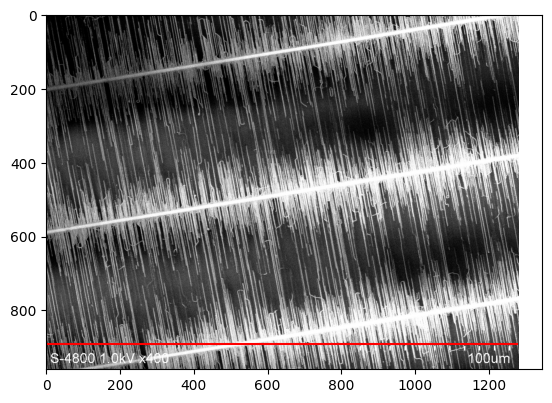

In [29]:
image = cv2.imread(os.path.join(datadir, "kaneda_m001.tif"))
print(image.shape)
plt.imshow(image)
plt.hlines(cutline, 0, image.shape[1], colors='r')
plt.show()

In [30]:
imd = image[0:cutline,:,:]

(890, 1280, 3)


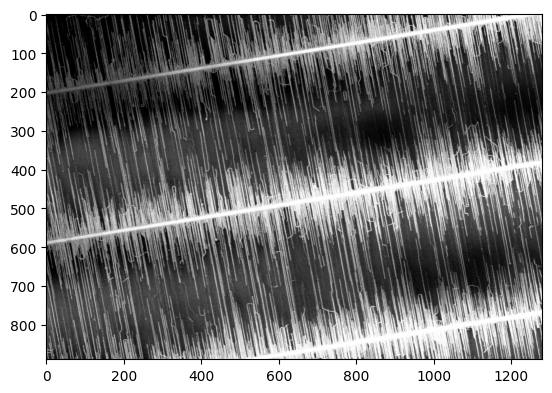

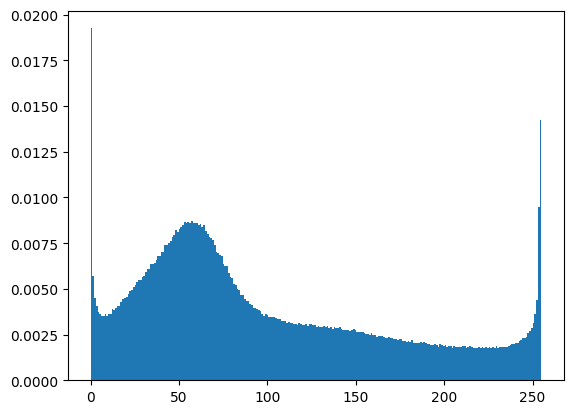

In [31]:
print(imd.shape)
imdflatt = imd.copy().flatten()
plt.imshow(imd)
plt.show()
plt.hist(imdflatt, bins=256, density=True)
plt.show()

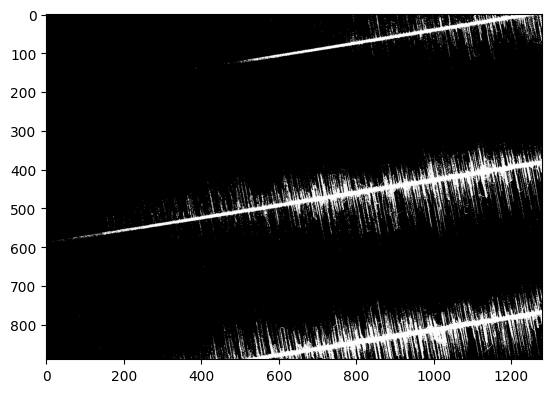

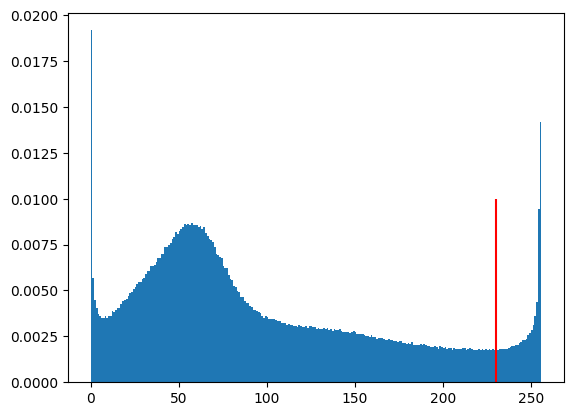

In [32]:
thereshold = 230
imdlight = np.where(imd < thereshold, 0, imd)
plt.imshow(imdlight)
plt.show()
plt.hist(imdflatt, bins=256, range=(0, 256), density=True)
plt.vlines(thereshold, 0, 0.01, color='r')

In [33]:
imd_cropped = image[0:100,1100:1200,:]

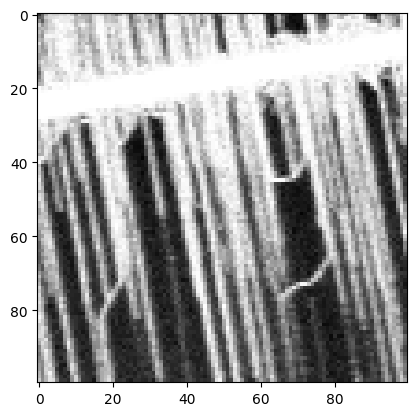

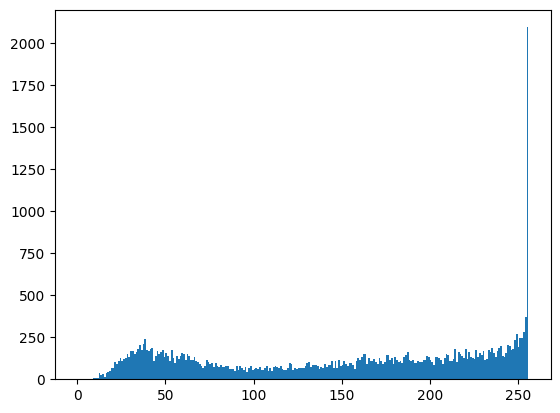

In [34]:
plt.imshow(imd_cropped)
plt.show()
plt.hist(imd_cropped.flatten(), bins=256, range=(0, 256))
plt.show()

# パワースペクトルの表示

(890, 1280, 3)


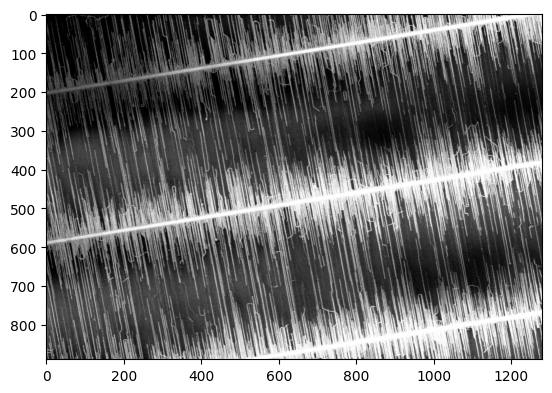

In [35]:
print(imd.shape)
plt.imshow(imd)
plt.show()

### グレースケールへの変換の前処理

In [36]:
imd = cv2.cvtColor(imd, cv2.COLOR_BGR2GRAY)
print(imd.shape)

(890, 1280)


### 回転の前処理

In [37]:
angle = -9.3

In [38]:
height, width = imd.shape
center = (int(width/2), int(height/2))
print(height, width, center)

890 1280 (640, 445)


In [39]:
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
rotated_image = cv2.warpAffine(imd, rotation_matrix, (width, height))

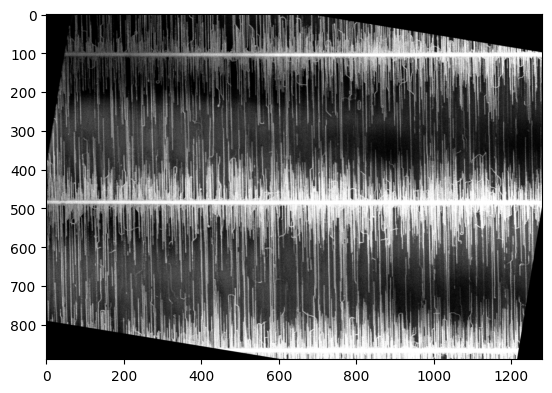

In [40]:
plt.imshow(rotated_image, cmap='gray')
plt.show()

In [41]:
crop_rotated = rotated_image[70:600, 100:900]

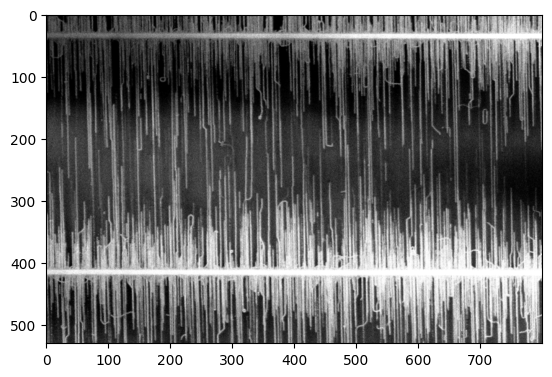

In [42]:
plt.imshow(crop_rotated, cmap='gray')
plt.show()

### パワースペクトルの表示

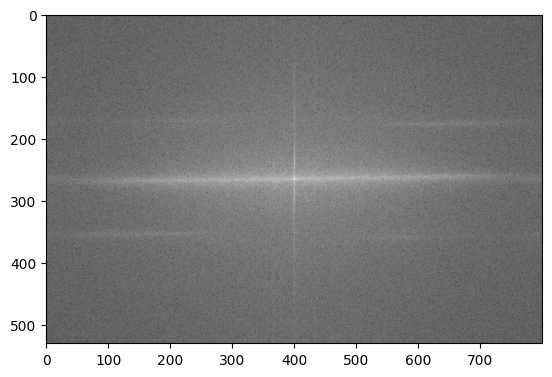

In [43]:
fimage = np.fft.fft2(crop_rotated)
fshift = np.fft.fftshift(fimage)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.imshow(magnitude_spectrum, cmap='gray')
plt.show()

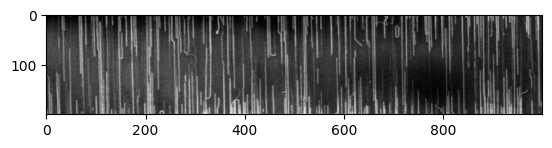

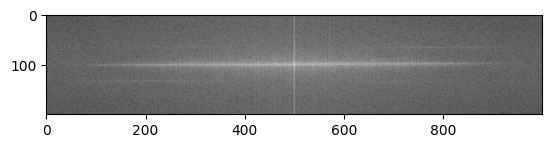

In [44]:
crop_rotated2 = rotated_image[200:400, 100:1100]
plt.imshow(crop_rotated2, cmap='gray')
plt.show()
fimage2 = np.fft.fft2(crop_rotated2)
fshift2 = np.fft.fftshift(fimage2)
magnitude_spectrum2 = 20*np.log(np.abs(fshift2))
plt.imshow(magnitude_spectrum2, cmap='gray')
plt.show()

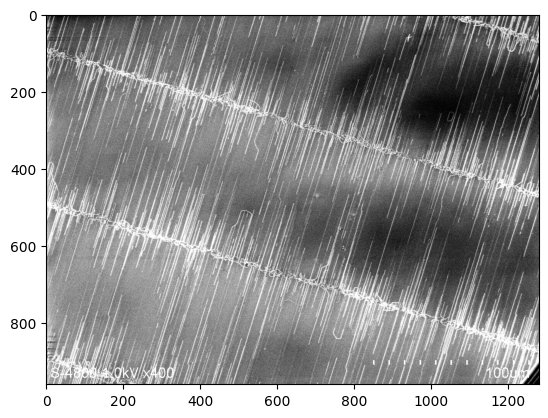

In [45]:
img2 = cv2.imread(os.path.join(datadir, "241024CVDfe0.05-15.tif"), cv2.IMREAD_GRAYSCALE)
plt.imshow(img2, cmap='gray')
plt.show()

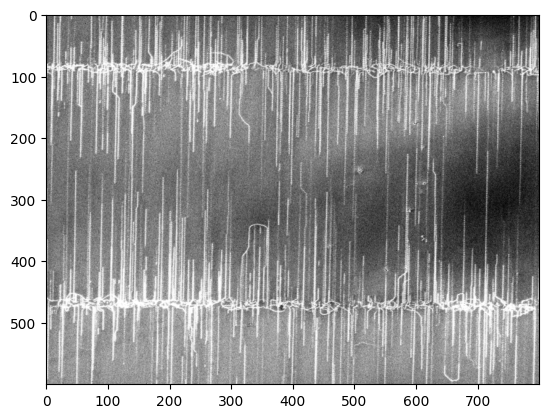

In [46]:
angle = 16
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
rotated_image2 = cv2.warpAffine(img2, rotation_matrix, (width, height))
crop_rotated3 = rotated_image2[200:800, 200:1000]
plt.imshow(crop_rotated3, cmap='gray')
plt.show()

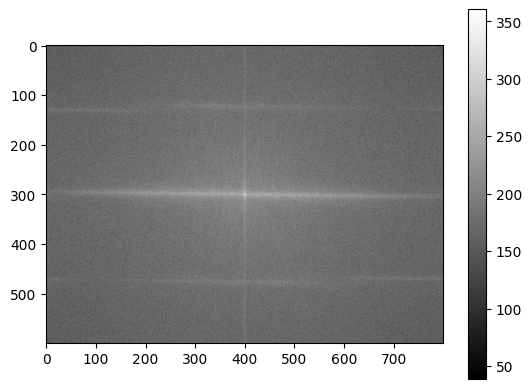

In [47]:
fimage3 = np.fft.fft2(crop_rotated3)
fshift3 = np.fft.fftshift(fimage3)
magnitude_spectrum3 = 20*np.log(np.abs(fshift3))
plt.imshow(magnitude_spectrum3, cmap='gray')
plt.colorbar()
plt.show()

# パワースペクトルから逆変換で戻す

In [48]:
def ifft(spec: np.ndarray) -> np.ndarray:
    fshift = np.fft.ifftshift(spec)
    img_back = np.fft.ifft2(fshift)
    img_back = np.abs(img_back)
    return img_back

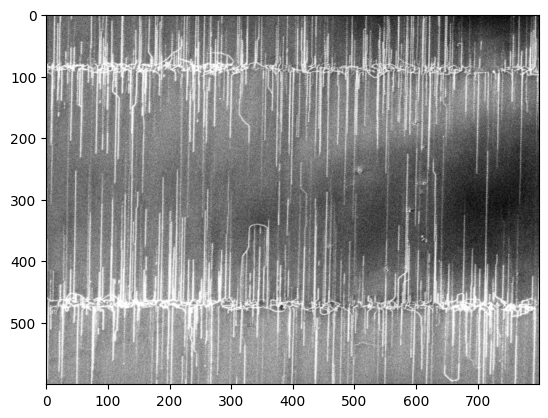

In [49]:
plt.imshow(ifft(fshift3), cmap='gray')
plt.show()

# 復元するパワースペクトルを絞る

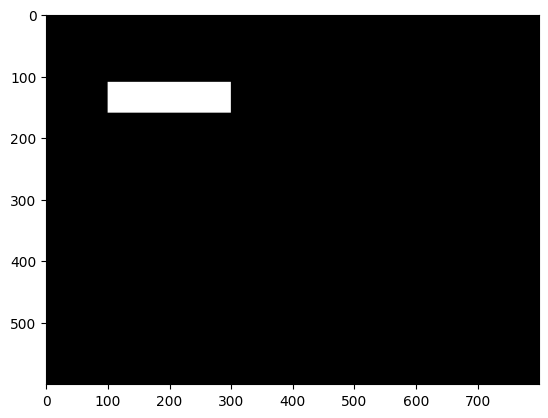

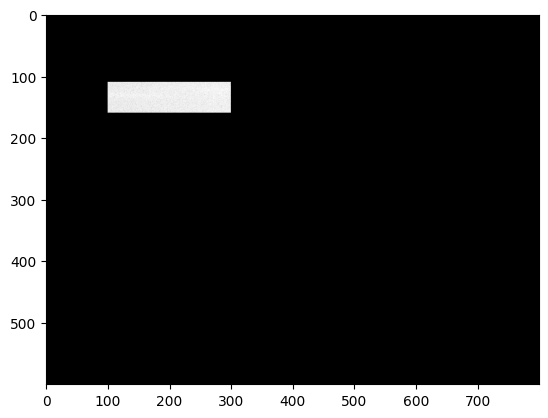

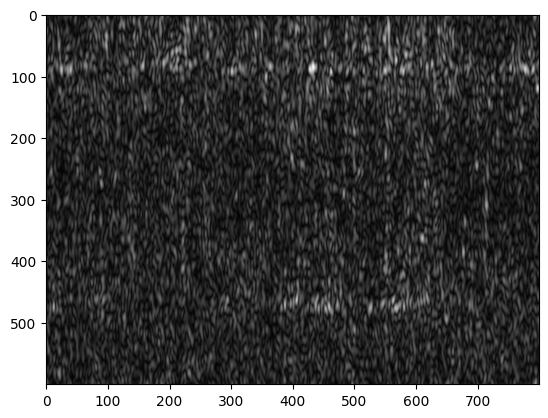

In [50]:
filter = np.zeros((600, 800), np.uint8)
filter[110:160, 100:300] = 1

plt.imshow(filter, cmap='gray')
plt.show()


filtered = fshift3 * filter
plt.imshow(20*np.log(np.abs(filtered)+eps), cmap='gray')
plt.show()

plt.imshow(ifft(filtered), cmap='gray')
plt.show()